# Automatic Speech Recognition (ASR)

## Theoritical Aspect

**References:** 
- [Nvidia Developers Blog: Guide to ASR Technology](https://developer.nvidia.com/blog/essential-guide-to-automatic-speech-recognition-technology/)

Speech recognition technology is capable of converting spoken language (an audio signal) into written text that is often used as a command.

ASR is commonly seen in user facing applications such as: Virtual Agents, Live captions etc.

Natural Language Processing (NLP) is core in ASR pipeline, aside from being applied in Language model, it is also used to augment generated transcipts with puntuation and capitalization at the end of ASR pipeline.

Once the transcript is post-processed with NLP, The text is then used for downstram Language modelling task:
- Sentiment Analysis
- Text Analytics
- Text Summarization
- Question Answering

Speech recognition algorithms can be implemented in a `traditional way using statistical algorithms` or by using `deep learning techniques such as neural networks` to convert speech into text.


### Traditional ASR algorithms

#### Hidden Markov models (HMM)

#### Dynamic time warping (DTW) 

## Implementation

### Loading Metadata

In [58]:
import os
from pathlib import Path
import pandas as pd

In [59]:
dataset_path = Path('dataset/cv-corpus-16.1-delta-2023-12-06/')
file_duration_path = dataset_path / 'en' / 'clip_durations.tsv'
validated_clips_metadata_path = dataset_path / 'en' / 'validated.tsv'
# for child in dataset_path.iterdir():
    # print(child)
# file_duration_path.exists()

metadata = pd.read_table(validated_clips_metadata_path)
metadata = metadata.set_index('path')

clip_durations = pd.read_table(file_duration_path)
clip_durations = clip_durations.set_index('clip')

In [60]:
metadata

,client_id,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment
path,,,,,,,,,,
common_voice_en_39584989.mp3,00cb430b113e0ac0ec056de203bfcefbd45ea814b48460...,These locomotives are serviced at Washwood Heath.,2,0,NaN,NaN,NaN,NaN,en,NaN
common_voice_en_39576542.mp3,02cc5a0c68b0ac69c83a24da884f3e7069f63b0078cddb...,"Here, she turned her inspirations towards writ...",3,0,NaN,NaN,"England English,Esturine, from the region arou...",NaN,en,NaN
common_voice_en_39582342.mp3,02e97f2f112f01eee1db675e7eb23850294dc865524581...,There is also a garnet mine in West Redding.,2,0,NaN,NaN,NaN,NaN,en,NaN
common_voice_en_38497561.mp3,02fa98c5a9a3e74e0014dec1e4825a9e29f7b918de2278...,"They hastily drive to the plane, and flee from...",2,0,NaN,NaN,"canadian - toronto english,Canadian English",NaN,en,NaN
common_voice_en_39263187.mp3,04347480ab0b18a8f9c3285107d106945cb2b14d430cdc...,They found one such edge in Fairbairn's system.,2,1,NaN,NaN,NaN,NaN,en,NaN
...,...,...,...,...,...,...,...,...,...,...
common_voice_en_38852923.mp3,cf166b2a376b2518887f5a2e3c347a69f495260309ac27...,She seems to have played little part in politics.,4,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",NaN,en,NaN
common_voice_en_38853034.mp3,cf166b2a376b2518887f5a2e3c347a69f495260309ac27...,He made his film debut from movie Uma.,2,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",NaN,en,NaN
common_voice_en_38855973.mp3,cf166b2a376b2518887f5a2e3c347a69f495260309ac27...,There are no known remaining records of the fi...,2,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",NaN,en,NaN


In [61]:
clip_durations

,duration[ms]
clip,
common_voice_en_38739592.mp3,7056
common_voice_en_38964148.mp3,3492
common_voice_en_38694636.mp3,3636
common_voice_en_38627562.mp3,5256
common_voice_en_39017255.mp3,4608
...,...
common_voice_en_39237544.mp3,2196
common_voice_en_39575177.mp3,8496
common_voice_en_38558646.mp3,5400


In [62]:
metadata = metadata.join(clip_durations)

In [63]:
client_id_hash_table = dict()
spk_number = 1
for i in metadata['client_id']:
    if i in client_id_hash_table:
        continue
    else:
        client_id_hash_table[i] = spk_number
        spk_number += 1

In [64]:
client_id_hash_table

{'00cb430b113e0ac0ec056de203bfcefbd45ea814b484600af8a20e5ddb9eaa9c471889074790bbd4133ecece80dcf0fbba448fe3e0d7cf15e6f500766622f940': 1,
 '02cc5a0c68b0ac69c83a24da884f3e7069f63b0078cddba1b2e15ff875cea53ef3145e0126b9281115c19ac78417234667ad1834a33ac7e72f17b7dde35e55f0': 2,
 '02e97f2f112f01eee1db675e7eb23850294dc865524581a1f5ade3b2ed924da46c8921ad147fd196b5143ad36fea3549169ae5086dfe8d9690fe039c7afc7d34': 3,
 '02fa98c5a9a3e74e0014dec1e4825a9e29f7b918de2278b80d3c8b148a5809488948ecdd83fafdea1171f78cdd22e3d69a6858e63a3008c230caef5d6f928632': 4,
 '04347480ab0b18a8f9c3285107d106945cb2b14d430cdc78bf5b73b13e5ea3b4a3f4a9428a6cf9cfe31ba276ddbe3a103611f3c1df69d6f4937a9cf1da3678dc': 5,
 '059e6e48ab8e9659233a4e32dbeadfbdd0c240e923977d06ea5de0f7c887318958a25a007d231d2b6b704f5fe5bf090e440ef5eb910a11e7523ce7b7ca726d08': 6,
 '08684d8060e5a83e24f813a6e06ad38de309b9aa11fdbffb142323b205f029c5faff53931f6b47d024980ed4ba1ab463aa9c6eb05b5aab981fed8e44ea2653ef': 7,
 '09f36cc6063875e8d0a374f597479b4a1b6b5b40a3826f

In [65]:
print("Changing Client-id to simpler form (for better understanding) ...")
for indx , row in metadata.iterrows():
    if type(metadata.at[indx,'client_id'])!='int':
        metadata.at[indx, 'client_id'] = client_id_hash_table[row['client_id']]
    # metadata = metadata.drop('client_id', axis=1)
metadata

Changing Client-id to simpler form (for better understanding) ...


,client_id,sentence,up_votes,down_votes,age,gender,accents,variant,locale,segment,duration[ms]
path,,,,,,,,,,,
common_voice_en_39584989.mp3,1,These locomotives are serviced at Washwood Heath.,2,0,NaN,NaN,NaN,NaN,en,NaN,5976
common_voice_en_39576542.mp3,2,"Here, she turned her inspirations towards writ...",3,0,NaN,NaN,"England English,Esturine, from the region arou...",NaN,en,NaN,6084
common_voice_en_39582342.mp3,3,There is also a garnet mine in West Redding.,2,0,NaN,NaN,NaN,NaN,en,NaN,5184
common_voice_en_38497561.mp3,4,"They hastily drive to the plane, and flee from...",2,0,NaN,NaN,"canadian - toronto english,Canadian English",NaN,en,NaN,6516
common_voice_en_39263187.mp3,5,They found one such edge in Fairbairn's system.,2,1,NaN,NaN,NaN,NaN,en,NaN,4896
...,...,...,...,...,...,...,...,...,...,...,...
common_voice_en_38852923.mp3,377,She seems to have played little part in politics.,4,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",NaN,en,NaN,5148
common_voice_en_38853034.mp3,377,He made his film debut from movie Uma.,2,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",NaN,en,NaN,4860
common_voice_en_38855973.mp3,377,There are no known remaining records of the fi...,2,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",NaN,en,NaN,7056


In [66]:
print("Removing completely NULL columns")
metadata.dropna(how='all',axis=1,inplace=True)
metadata

Removing completely NULL columns


,client_id,sentence,up_votes,down_votes,age,gender,accents,locale,duration[ms]
path,,,,,,,,,
common_voice_en_39584989.mp3,1,These locomotives are serviced at Washwood Heath.,2,0,NaN,NaN,NaN,en,5976
common_voice_en_39576542.mp3,2,"Here, she turned her inspirations towards writ...",3,0,NaN,NaN,"England English,Esturine, from the region arou...",en,6084
common_voice_en_39582342.mp3,3,There is also a garnet mine in West Redding.,2,0,NaN,NaN,NaN,en,5184
common_voice_en_38497561.mp3,4,"They hastily drive to the plane, and flee from...",2,0,NaN,NaN,"canadian - toronto english,Canadian English",en,6516
common_voice_en_39263187.mp3,5,They found one such edge in Fairbairn's system.,2,1,NaN,NaN,NaN,en,4896
...,...,...,...,...,...,...,...,...,...
common_voice_en_38852923.mp3,377,She seems to have played little part in politics.,4,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",en,5148
common_voice_en_38853034.mp3,377,He made his film debut from movie Uma.,2,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",en,4860
common_voice_en_38855973.mp3,377,There are no known remaining records of the fi...,2,0,twenties,female,"Southern African (South Africa, Zimbabwe, Nami...",en,7056


### Loading Audio & Extracting Features

In [67]:
import librosa
import matplotlib as plt
import numpy as np

In [68]:
import IPython.display as ipd
import seaborn as sns
from itertools import cycle
import matplotlib.pyplot as plt

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [69]:
def normalize_audio(audio_file):
    return librosa.util.normalize(audio_file)

In [70]:
def load_audio(audio_path, sample_rate=16000):
    # for more information about sample_rate: Read StudyMaterial/Sample_Rate.md
    # for more information about why mono=True is used: Read StudyMaterial/Mono_vs_Stereo.md
    audio,sampling_rate = librosa.load(audio_path, sr=sample_rate, mono=True)
    normalize_audio(audio)
    return audio

In [71]:
def display_spec(spec_db):
    plt.figure()
    librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [72]:
def mel_spectrogram(audio_file, sample_rate=16000):
    # computing spectrogram
    spec = librosa.feature.melspectrogram(y=audio_file, sr=sample_rate)
    # coverting it to decibels
    spec_db = librosa.power_to_db(spec, ref=np.max)
    display_spec(spec_db)


In [73]:
from sklearn.model_selection import train_test_split
training_metadata, test_and_val_metadata = train_test_split(metadata, test_size=0.2, random_state=42)
validation_metadata, testing_metadata = train_test_split(test_and_val_metadata, test_size=0.5, random_state=42)

print(f"Training Metadata Size: \t{len(training_metadata)}")
print(f"Testing Metadata Size: \t\t {len(testing_metadata)}")
print(f"Validation Metadata Size: \t {len(validation_metadata)}")
print(f"Metadata Size: \t\t\t{len(metadata)}")

Training Metadata Size: 	2726
Testing Metadata Size: 		 341
Validation Metadata Size: 	 341
Metadata Size: 			3408


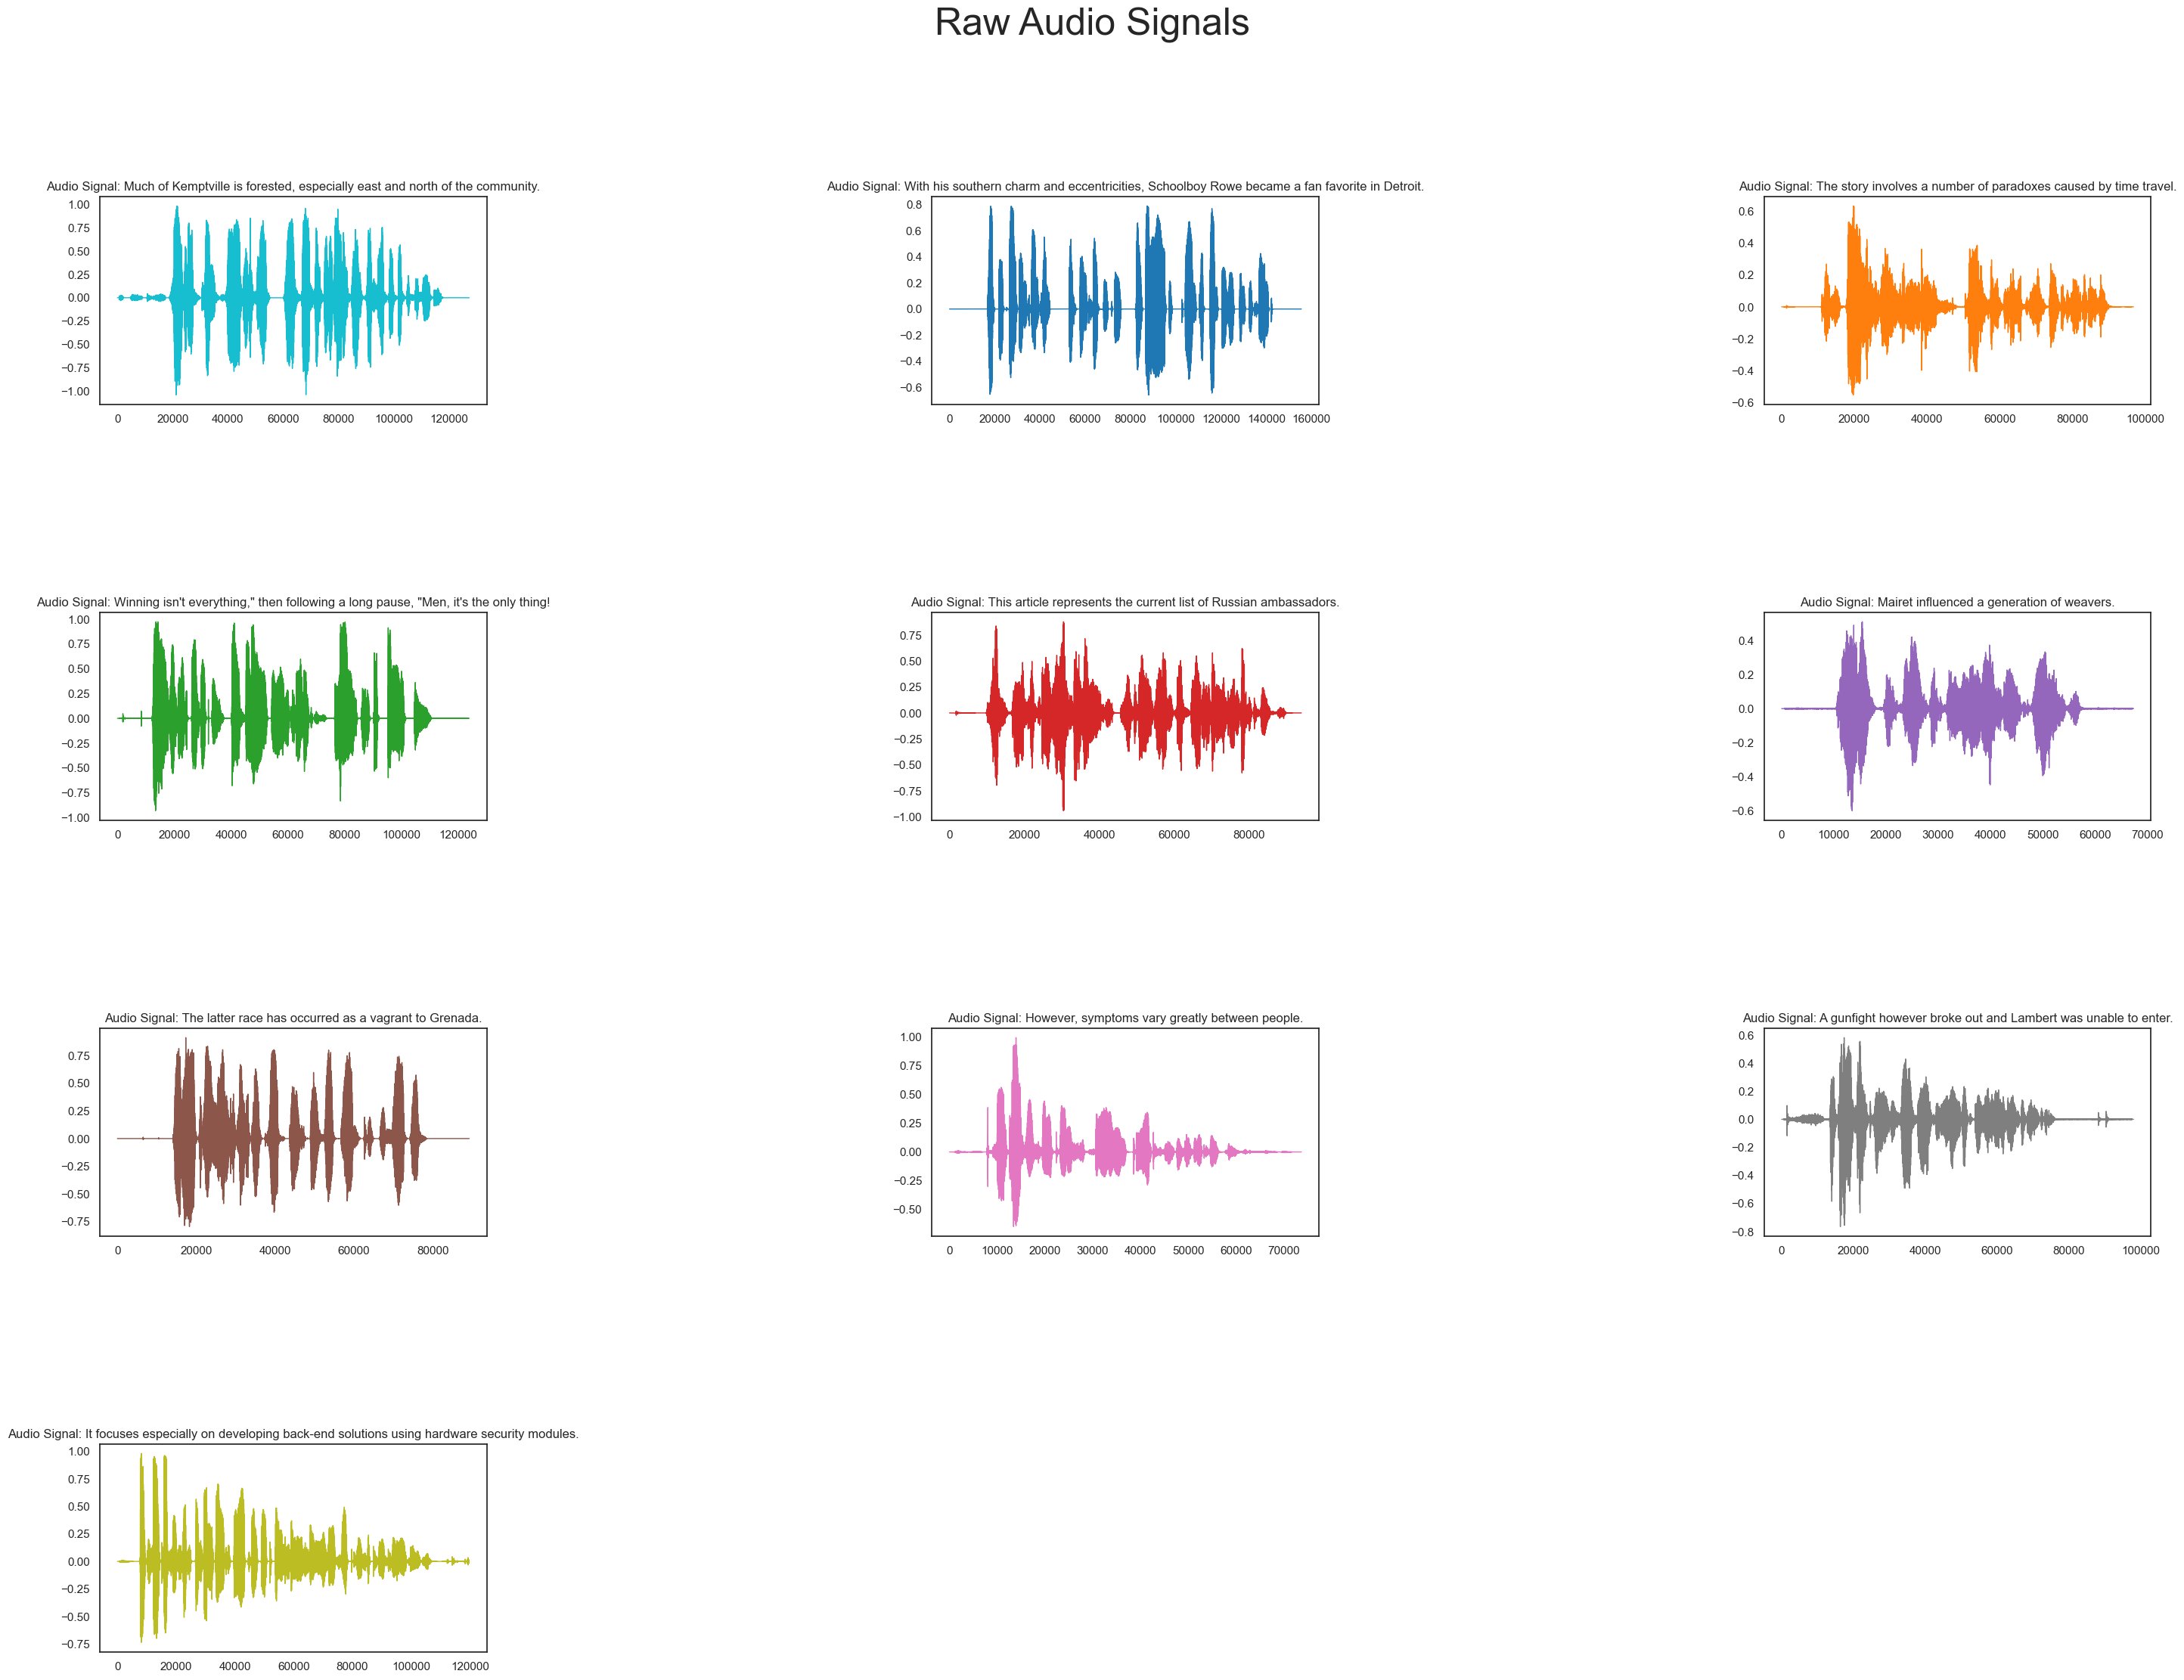

In [85]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(35, 25))
axes = axes.flatten()  #for easy indexing
fig.suptitle('Raw Audio Signals', fontsize=36)


x = 0
for audio_path, row in training_metadata.iterrows():
    transcript = row['sentence']
    audio = load_audio(dataset_path / 'en' / 'clips' / audio_path)
    axes[x].plot(audio, lw=1, color=next(color_cycle))
    axes[x].set_title(f"Audio Signal: {transcript}")
    x+=1
    if x%10==0:
        break


# Hide any unused subplots
for i in range(x, len(axes)):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1,wspace=1.15)

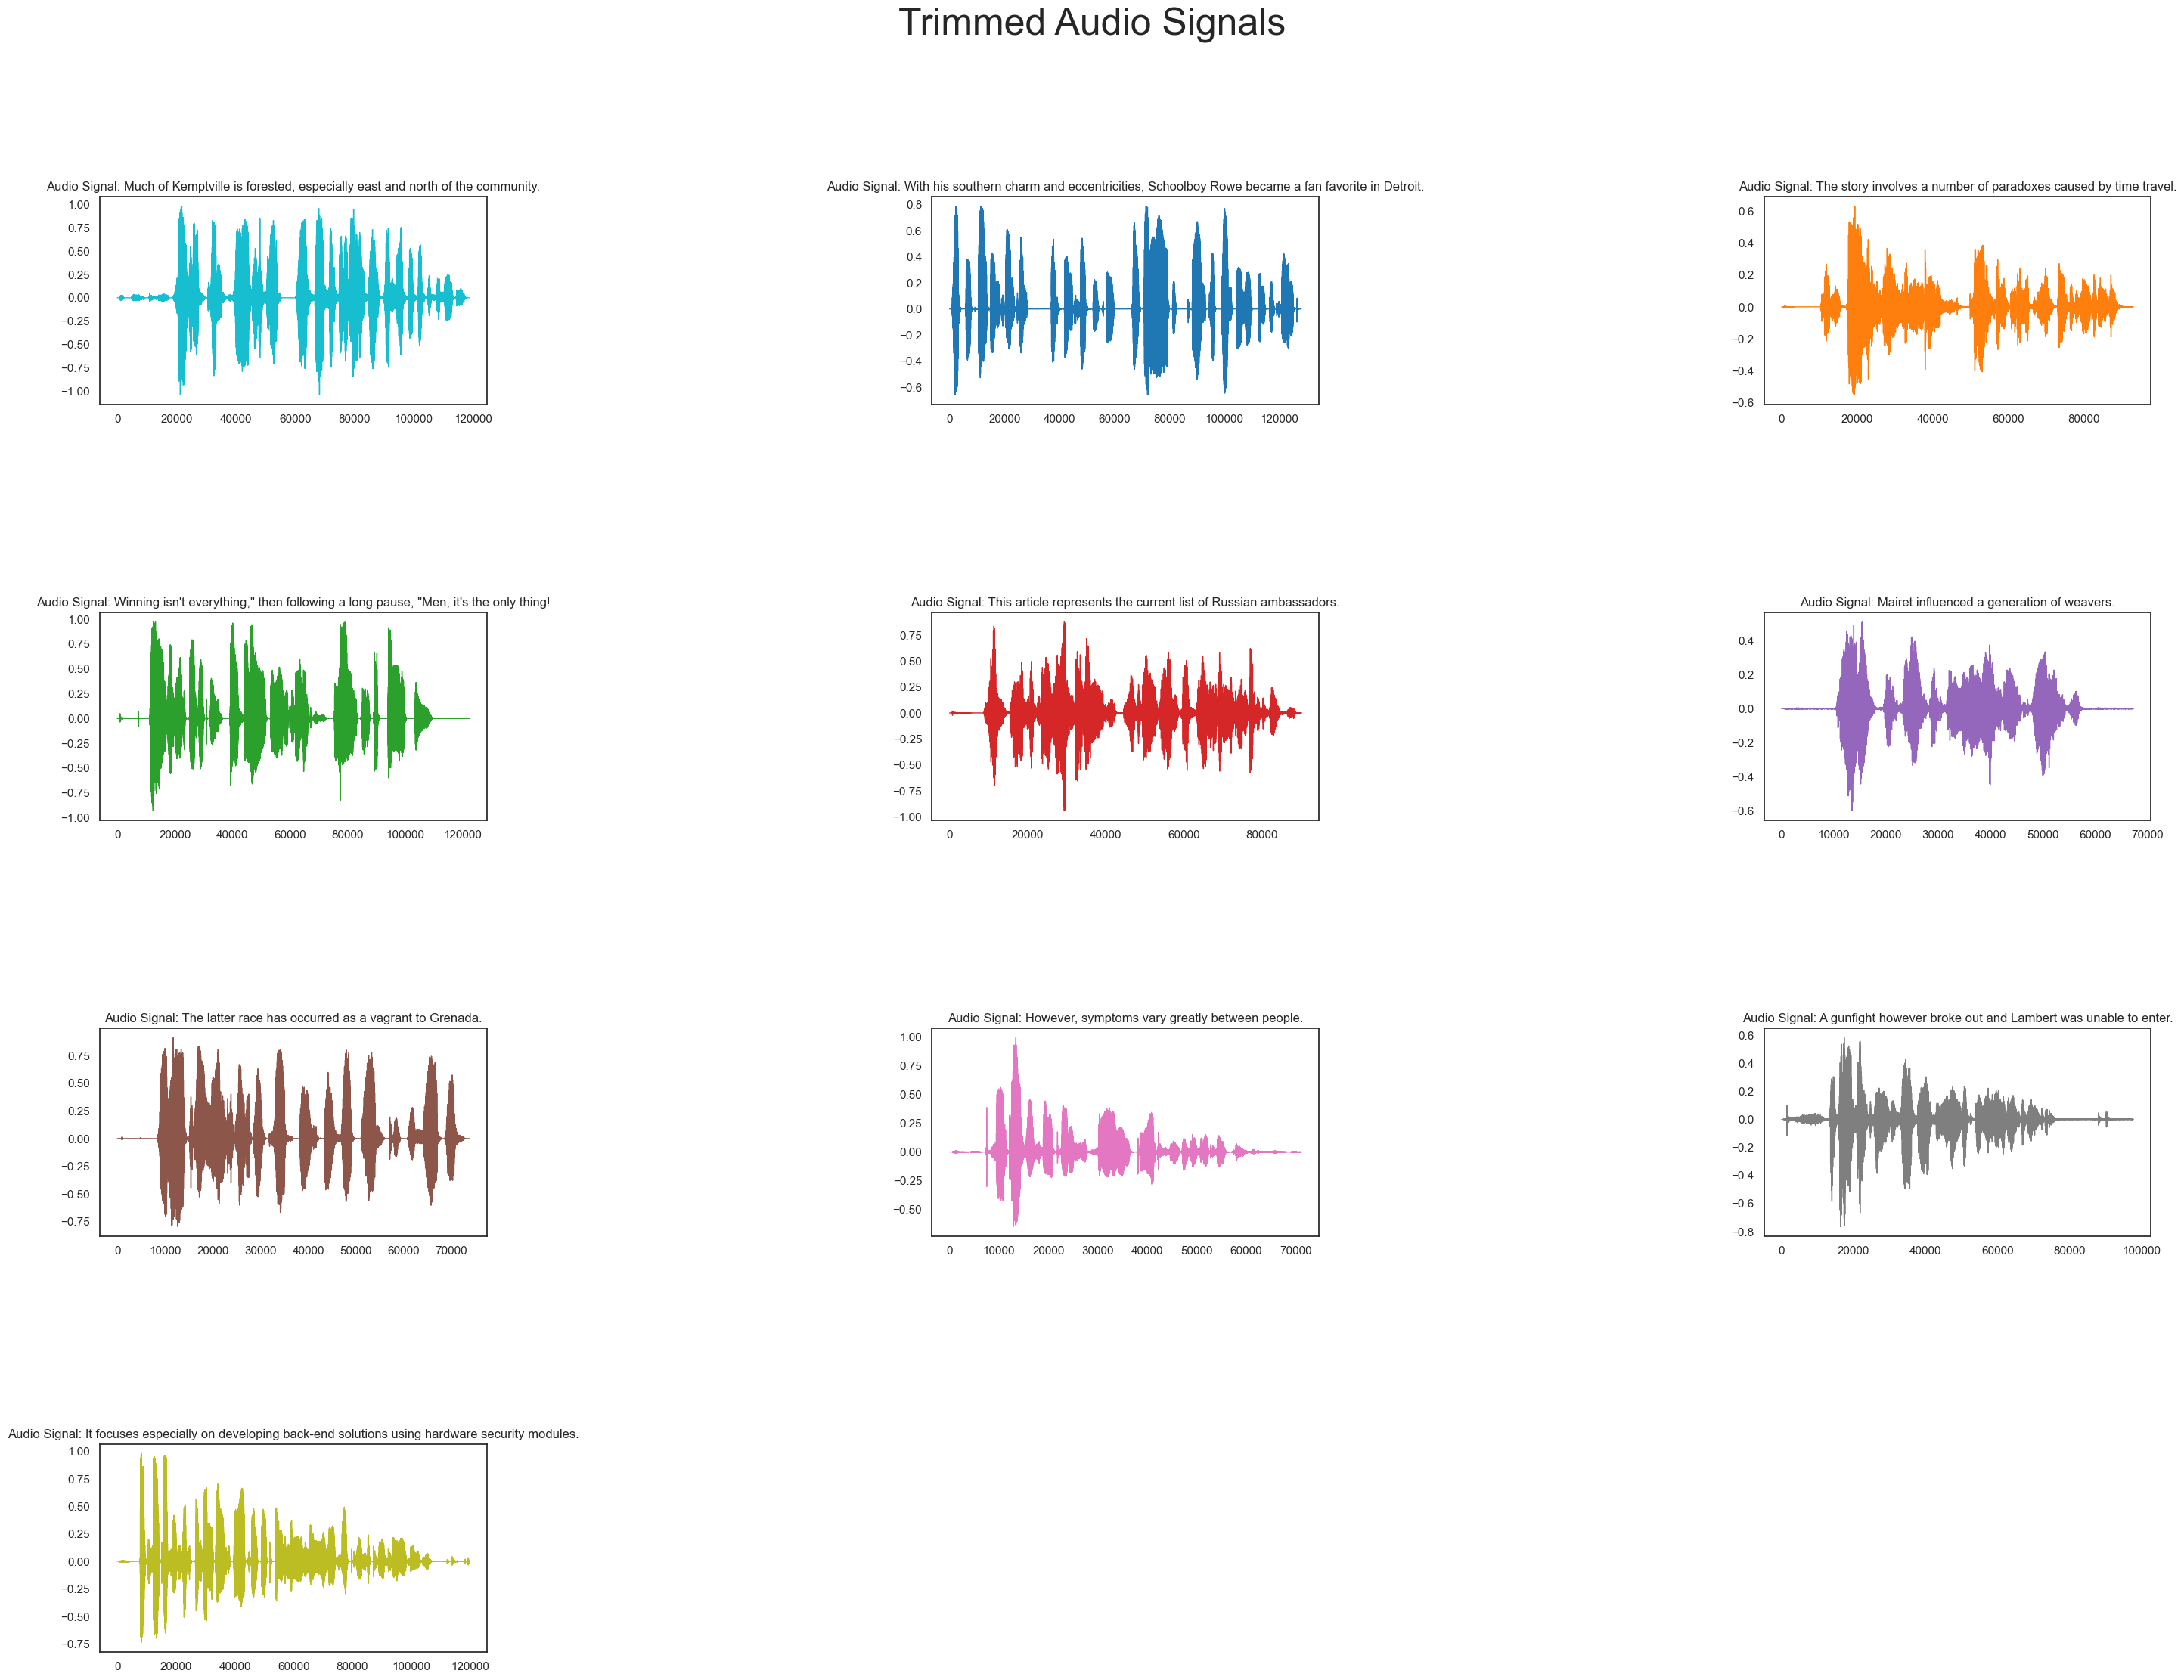

In [84]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(35, 25))
axes = axes.flatten()  #for easy indexing
fig.suptitle('Trimmed Audio Signals', fontsize=36)

x = 0
for audio_path, row in training_metadata.iterrows():
    transcript = row['sentence']
    audio = load_audio(dataset_path / 'en' / 'clips' / audio_path)
    trimmed_audio, _ = librosa.effects.trim(audio)
    axes[x].plot(trimmed_audio, lw=1, color=next(color_cycle))
    axes[x].set_title(f"Audio Signal: {transcript}")
    x+=1
    if x%10==0:
        break


# Hide any unused subplots
for i in range(x, len(axes)):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1,wspace=1.15)